In [25]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from coda import EventTransformer, BIDSEventReader
from glob import glob

reader = BIDSEventReader()
all_runs = pd.concat([reader.read(f) for f in glob('*.tsv')])

transformer = EventTransformer(all_runs)
data = transformer.data#.replace([np.inf, -np.inf], np.nan)

data = data.drop('onset', axis=1)
data = data.fillna('0')
data = data.convert_objects(convert_numeric=True)

In [33]:
data['60_250'].max()

16.749352770449367

In [22]:
all_data = pd.concat([pd.read_csv(f, sep='\t') for f in glob('*.tsv')])

In [24]:
all_data[all_data.til_type == '60_250']

AttributeError: 'DataFrame' object has no attribute 'til_type'

In [34]:
corr = data.corr()

In [35]:
corr = corr.round(2)

In [36]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

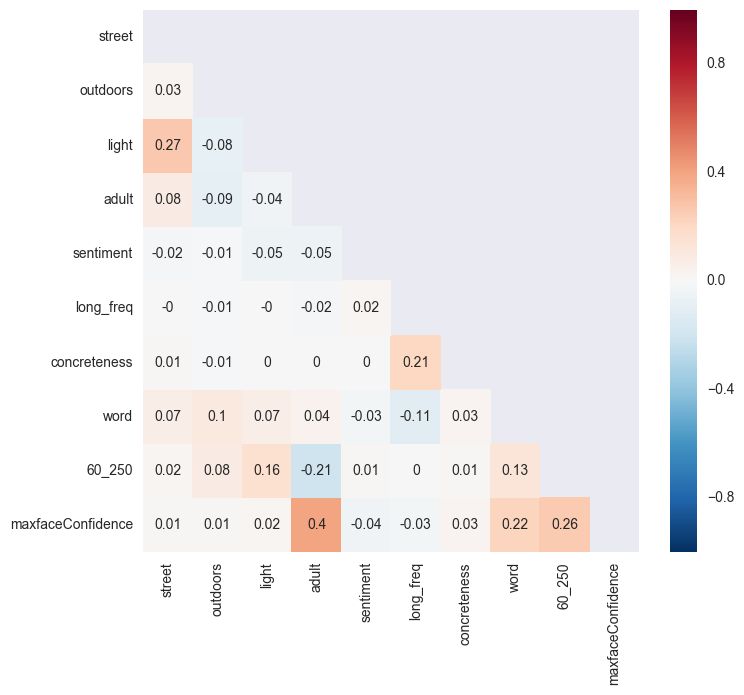

In [37]:
width = 8
height = 7
plt.figure(figsize=(width, height))
sns.heatmap(corr, mask=mask, annot=True)